Regression linéaire
===================

Equation : $ Y = X.\theta + N$  
Where N is a noise vector
and $\theta = (a,b)$ a vector as y = a.x + b  


In [1]:
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt

import deepmods.notebook as ooo

ooo.init(id='01', save_figs=True)



Deepmod by pjluc 2019
  Version          : 0.4.1
  Run time         : Monday 16 September 2019, 13:55:03
  Run directory    : ./run/lab-01
  Save figs        : True
  Matplotlib style : deepmods/talk.mplstyle
  Hide warning     : True

TensorFlow version :  1.14.0
Keras version      :  2.2.4-tf

Init done.


In [2]:
# ---- Paramètres
nb    = 100     # Nombre de points
xmin  = 0       # Distribution / x
xmax  = 10
a     = 4       # Distribution / y
b     = 2       # y= a.x + b (+ bruit)
noise = 7       # bruit

theta = np.array([b,a]).reshape(-1,1)
# or nb.array[[a],[b]]

# ---- Vecteur X  (1,x) x nb
#      la premiere colonne est a 1 afin que X.theta <=> 1.b + x.a

Xc1 = np.ones((nb,1))
Xc2 = np.random.uniform(xmin,xmax,(nb,1))
X = np.c_[ Xc1, Xc2 ]

# ---- Noise
# N = np.random.uniform(-noise,noise,(nb,1))
N = noise * np.random.normal(0,1,(nb,1))

# ---- Vecteur Y
Y = (X @ theta) + N

#print("X:\n",X,"\nY:\n ",Y)

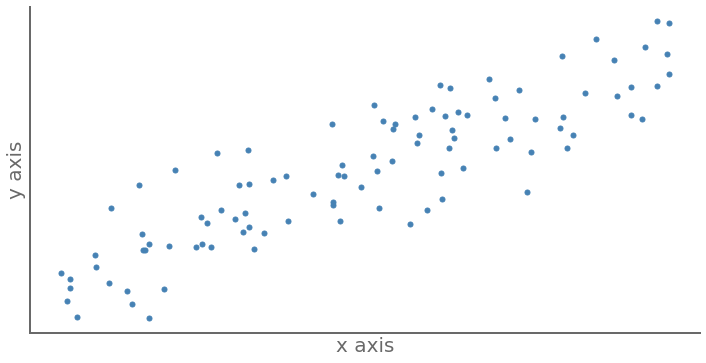

In [3]:
width = 12
height = 6
mx=math.fabs(xmax-xmin)*.05
my=math.fabs(a*xmax+2*noise-b)*.05

fig, ax = plt.subplots()
fig.set_size_inches(width,height)
ax.plot(X[:,1], Y, ".")
ax.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ooo.save_fig('LinearReg-a',svg=False)
plt.show()

Equation normale
----------------

On va essayer de trouver une valeur optimale de $\theta$, permettant de minimiser une fonction de coût.  
La fonction de coût, classiquement utilisée dans le cas des regressions linéaires, est la **racine carré de l'erreur quadratique moyenne** (*root mean square error*) :  

$RMSE(X,h_\theta)=\sqrt{\frac1n\sum_{i=1}^n\left[h_\theta(X^{(i)})-Y^{(i)}\right]^2}$  

Avec la variante simplifiée : $MSE(X,h_\theta)=\frac1n\sum_{i=1}^n\left[h_\theta(X^{(i)})-Y^{(i)}\right]^2$

La valeur optimale de la regression est : $ \hat{ \theta } =( X^{-T} .X)^{-1}.X^{-T}.Y$

Démontstration : https://eli.thegreenplace.net/2014/derivation-of-the-normal-equation-for-linear-regression

In [4]:
theta_hat = np.linalg.inv(X.T @ X) @ X.T @ Y

print("Theta :\n",theta,"\n\ntheta hat :\n",theta_hat)


Theta :
 [[2]
 [4]] 

theta hat :
 [[0.42457717]
 [4.19118775]]


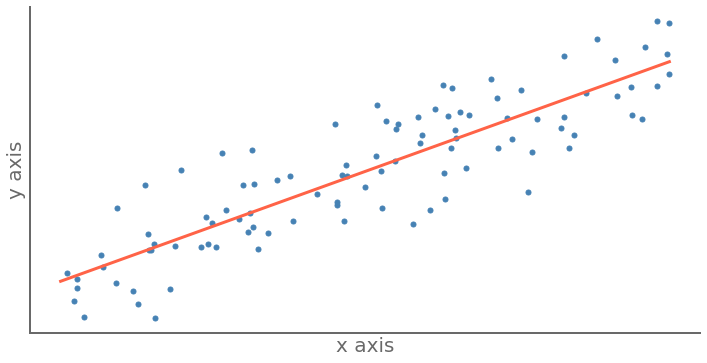

In [5]:
Xd = np.array([[1,xmin], [1,xmax]])
Yd = Xd @ theta_hat

fig, ax = plt.subplots()
fig.set_size_inches(width,height)
# plt.figure(figsize=(width, height))
ax.plot(X[:,1], Y, ".")
ax.plot(Xd[:,1], Yd, "-")
# plt.axis([xmin-mx, xmax+mx, b-noise-my, a*xmax+b+noise+my])
ax.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ooo.save_fig('LinearReg-b',svg=False)
plt.show()